TripAdvisor, Inc. is an American travel and restaurant website company that shows hotel and 
restaurant reviews, accommodation bookings and other travel-related content.It also includes 
interactive travel forums.

Headquartered in Needham, Massachusetts, TripAdvisor is the largest travel website in the 
world, with more than 315 million reviewers (active and inactive) and over 500 million reviews of 
hotels, restaurants, attractions and other travel-related businesses. TripAdvisor was an early 
adopter of user-generated content. The website services are free to users, who provide most of 
the content, and the website is supported by a hotel booking facility and an advertising business 
model.

This data set is populated by crawling TripAdvisor.com.
Reviews on destinations in 10 categories mentioned across East Asia are considered.
Each traveler rating is mapped as
Excellent (4)
Very Good (3)
Average (2)
Poor (1)
Terrible (0)

And average rating is used against each category per user.

All of us that use Trip Advisor gets good advice on where we can eat, sleep, go on adventure etc. 
So you are helping others get a good experience around the world which is a great benefit! 
Besides that the feeling of knowing that you've help others is always nice, which is why I often 
review restaurants on Trip Advisor.

The company wants to use this data to undestand who are having similar reviews on the 
following categories.
Attribute Information:
Attribute 1 : Unique user id
Attribute 2 : Average user feedback on art galleries
Attribute 3 : Average user feedback on dance clubs
Attribute 4 : Average user feedback on juice bars
Attribute 5 : Average user feedback on restaurants
Attribute 6 : Average user feedback on museums
Attribute 7 : Average user feedback on resorts
Attribute 8 : Average user feedback on parks/picnic spots
Attribute 9 : Average user feedback on beaches
Attribute 10 : Average user feedback on theaters
Attribute 11 : Average user feedback on religious institutions

In [1]:
#Handling Table link data and  metrics
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

#Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

#Configure Visualization
%matplotlib inline

In [47]:
#Read File 
df_trip=pd.read_csv("C:\\Users\\hp\\Downloads\\tripadvisor_review.csv")

In [48]:
#Count of rows and columns in data
df_trip.shape

(980, 11)

In [50]:
#Name of columns in data
df_trip.columns

Index(['User ID', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10'],
      dtype='object')

In [51]:
# First 5 columns form data
df_trip.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [52]:
#Last 5 columns forn data
df_trip.tail()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46
979,User 980,0.93,0.56,1.13,0.51,1.34,2.36,3.18,2.87,1.34,2.40


In [53]:
#Data types 
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [54]:
user = df_trip['User ID']

del df_trip['User ID']

In [55]:
# Data Description
df_trip.describe(include='all')

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [56]:
#Check of Null Values
df_trip.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

In [57]:
#Correlation of Data
df_trip.corr()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
Category 1,1.000000,-0.187692,0.008613,0.073456,-0.100483,0.094142,-0.012474,0.020029,-0.047313,0.050700
Category 2,-0.187692,1.000000,0.043586,0.131624,0.119631,0.148404,0.110052,-0.158642,0.073342,-0.065762
Category 3,0.008613,0.043586,1.000000,0.061128,0.281668,0.356435,0.750651,-0.172953,-0.085435,-0.440543
Category 4,0.073456,0.131624,0.061128,1.000000,0.101878,0.215866,0.228348,-0.103583,0.026670,-0.352909
Category 5,-0.100483,0.119631,0.281668,0.101878,1.000000,0.581306,0.232318,-0.020957,0.041693,-0.247470
Category 6,0.094142,0.148404,0.356435,0.215866,0.581306,1.000000,0.430743,0.000071,0.096410,-0.438104
Category 7,-0.012474,0.110052,0.750651,0.228348,0.232318,0.430743,1.000000,-0.072492,0.084965,-0.710731
Category 8,0.020029,-0.158642,-0.172953,-0.103583,-0.020957,0.000071,-0.072492,1.000000,0.169695,0.114701
Category 9,-0.047313,0.073342,-0.085435,0.026670,0.041693,0.096410,0.084965,0.169695,1.000000,-0.045682
Category 10,0.050700,-0.065762,-0.440543,-0.352909,-0.247470,-0.438104,-0.710731,0.114701,-0.045682,1.000000


<AxesSubplot:>

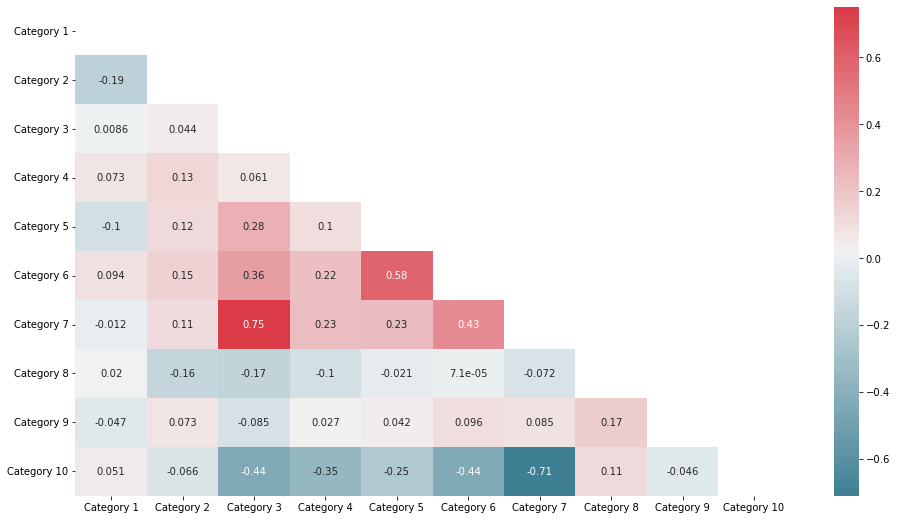

In [58]:
#Correlation Heatmap
f,ax=plt.subplots(figsize=(16,9))
cmap=sns.diverging_palette(220,10, as_cmap=True)
mask=np.zeros_like(df_trip.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df_trip.corr(),annot=True,cmap=cmap,mask=mask)

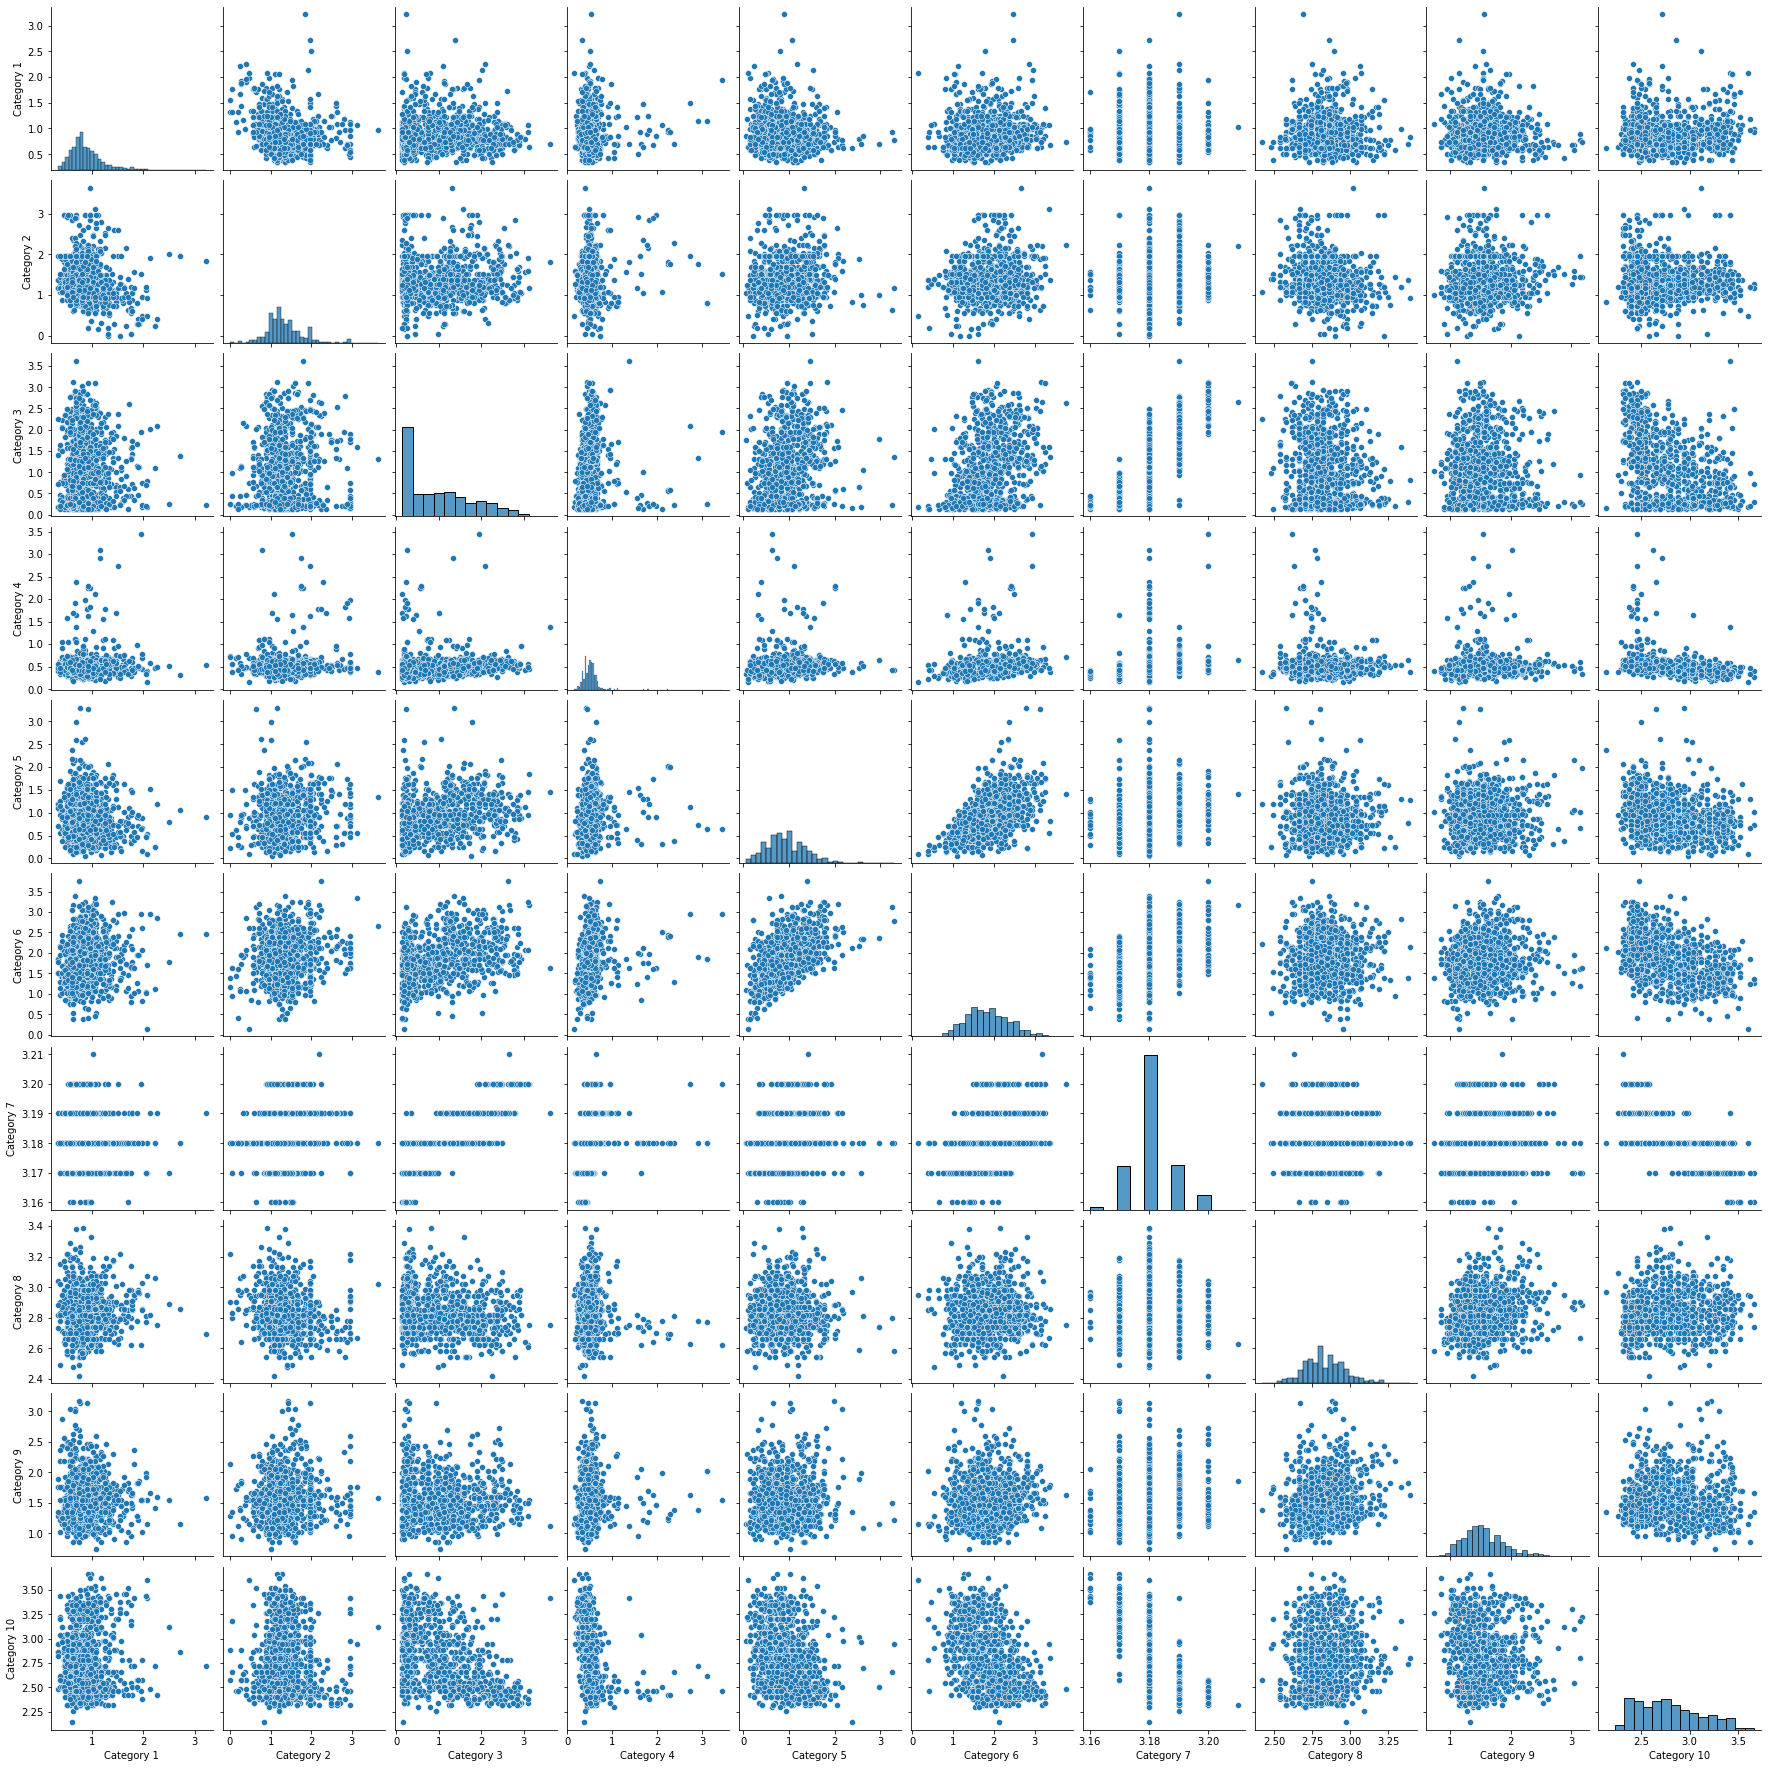

In [59]:

sns.pairplot(df_trip)

In [60]:
#Feature Scaling
X1 = pd.get_dummies(df_trip)

from sklearn.preprocessing import normalize
X=normalize(X1)

In [61]:
#Implementing the KMeans Clustering
from sklearn.cluster import KMeans
cluster_no = range(1,15)
wcss = []
for no in cluster_no:
    KM = KMeans(no ,random_state =1)
KM.fit(df)

KMeans(n_clusters=14, random_state=1)

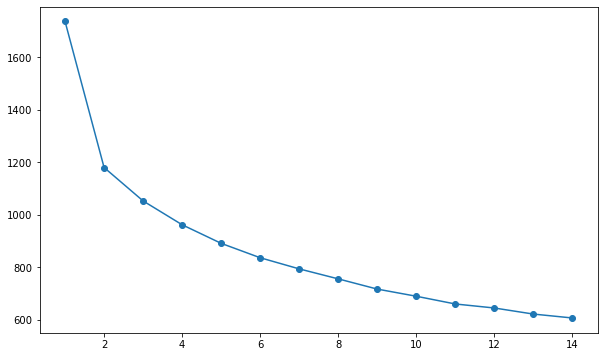

In [63]:
from sklearn.cluster import KMeans
cluster_no = range(1,15)
wcss = []
for no in cluster_no:
    KM = KMeans(no ,random_state =1)
    KM.fit(df_trip)
    wcss.append(KM.inertia_)
plt.figure(figsize=(10,6))
plt.plot(cluster_no,wcss,marker = 'o')

In [64]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =5,max_iter = 1000,random_state = None)
km.fit_transform(df_trip)

array([[2.05077387, 2.38325169, 0.72924976, 1.08092879, 1.59911862],
       [2.7439901 , 3.30211208, 1.53863117, 1.57060517, 2.5368863 ],
       [1.377277  , 0.94717219, 2.20785374, 1.96293508, 1.06558494],
       ...,
       [0.73552782, 0.948019  , 1.83491673, 1.27978625, 0.87073891],
       [2.3747432 , 1.63629782, 3.16403184, 3.09884244, 2.04913211],
       [1.40662595, 1.7663519 , 1.52477774, 1.19214984, 1.13072389]])

In [39]:
model = KMeans(n_clusters=5)

In [65]:
km.score(df_trip)

-890.929485615788

In [66]:
samples = df_trip.values

In [43]:
samples

array([[0.93, 1.8 , 2.29, ..., 2.79, 1.82, 2.42],
       [1.02, 2.2 , 2.66, ..., 2.63, 1.86, 2.32],
       [1.22, 0.8 , 0.54, ..., 2.8 , 1.31, 2.5 ],
       ...,
       [0.61, 1.32, 0.67, ..., 2.81, 1.34, 3.02],
       [0.93, 0.2 , 0.13, ..., 2.98, 1.12, 2.46],
       [0.93, 0.56, 1.13, ..., 2.87, 1.34, 2.4 ]])

In [44]:
labels = model.fit_predict(samples)

In [45]:
labels

array([2, 2, 4, 4, 3, 4, 4, 4, 3, 1, 3, 1, 2, 2, 2, 3, 0, 2, 3, 2, 3, 1,
       4, 4, 0, 2, 2, 0, 4, 2, 2, 2, 3, 1, 4, 0, 0, 4, 2, 4, 1, 4, 1, 1,
       1, 4, 4, 0, 1, 2, 1, 2, 3, 0, 4, 4, 2, 0, 2, 3, 2, 4, 4, 4, 0, 4,
       0, 4, 0, 4, 4, 2, 1, 2, 0, 3, 0, 2, 4, 1, 0, 0, 4, 0, 0, 4, 0, 4,
       1, 1, 4, 4, 2, 2, 3, 4, 2, 0, 2, 1, 1, 4, 3, 4, 4, 2, 3, 4, 0, 3,
       1, 0, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 3, 0, 3, 4, 4, 0, 0, 4, 0, 3,
       3, 3, 1, 1, 3, 3, 1, 4, 1, 4, 1, 4, 1, 1, 1, 2, 1, 3, 0, 1, 4, 1,
       4, 0, 1, 4, 3, 4, 0, 4, 1, 0, 0, 4, 2, 1, 2, 0, 1, 4, 4, 4, 0, 1,
       0, 0, 1, 4, 4, 3, 3, 0, 2, 1, 1, 4, 3, 4, 2, 2, 4, 1, 1, 4, 0, 2,
       4, 1, 2, 1, 2, 4, 0, 4, 1, 4, 0, 0, 0, 2, 1, 4, 4, 3, 4, 4, 3, 2,
       1, 0, 2, 4, 3, 4, 1, 0, 1, 2, 4, 2, 4, 4, 1, 1, 3, 1, 0, 4, 2, 3,
       4, 4, 4, 0, 4, 3, 0, 1, 0, 4, 2, 2, 4, 1, 4, 1, 0, 3, 0, 3, 4, 3,
       4, 3, 2, 3, 1, 3, 1, 0, 2, 2, 3, 4, 0, 1, 4, 1, 0, 0, 2, 3, 1, 4,
       3, 1, 0, 1, 2, 4, 4, 4, 4, 0, 4, 0, 0, 1, 4,

In [67]:
df = pd.DataFrame({'labels': labels, 'user': user})
ct = pd.crosstab(df['labels'], df['user'])
ct

user,User 1,User 10,User 100,User 101,User 102,User 103,User 104,User 105,User 106,User 107,...,User 973,User 974,User 975,User 976,User 977,User 978,User 979,User 98,User 980,User 99
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [71]:
df_ct = pd.DataFrame(ct)

In [77]:
(df_ct.sum(axis=1).sort_values(ascending=False))

labels
4    288
1    195
0    175
3    166
2    156
dtype: int64